In [6]:
from Video import Video_emotion_record

from playsound import playsound
import win32com.client
import os
from xgboost import XGBClassifier
from keras.models import load_model
import pandas as pd

import cv2
import numpy as np   
from keras.preprocessing.image import img_to_array

import matplotlib.pyplot as plt
import seaborn as sns

 
import pyaudio
import wave

import librosa
import librosa.display

from Record import Record_Stress 

from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings(action='ignore')


from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import speech_recognition as sr

from STT import Speech_to_text

from Text_sentiment import sentiment_predict

from S2S import *


In [ ]:
# !if not exist "./files" mkdir files
# !curl -L -o ./files/haarcascade_frontalface_default.xml https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
# !curl -L -o ./files/emotion_model.hdf5 https://mechasolution.vn/source/blog/AI-tutorial/Emotion_Recognition/emotion_model.hdf5

In [7]:
Bio_data=pd.DataFrame([{'BVP':0.444368,'GSR':0.158522,'TMP':0.717391}])

In [8]:
os.listdir()

['.ipynb_checkpoints',
 'audio_test',
 'best_model.h5',
 'CNN_audio_model.h5',
 'decoder_model.json',
 'decoder_model_weights.h5',
 'drive-download-20201217T144748Z-001',
 'encoder_model.json',
 'encoder_model_weights.h5',
 'files',
 'index_to_word.pickle',
 'Model',
 'Multimodal_affect_model.h5',
 'output.wav',
 'Pickle',
 'Record.py',
 'record_images',
 'S2S.py',
 'S2S.txt',
 'Seq_2_Seq_model.h5',
 'STT.py',
 'Text_sentiment.py',
 'Untitled.ipynb',
 'Video.py',
 'word_to_index.pickle',
 'XGBoost.json',
 '__pycache__']

In [34]:
tts = win32com.client.Dispatch("SAPI.SpVoice")
model1=XGBClassifier()
model1.load_model('XGBoost.json')
model2=load_model('CNN_audio_model.h5')

In [ ]:
class ASHP():
    
    def __init__(self,name):
        self.name=name
    
    def Talk1(self):
        tts.Speak(f'{self.name}님 반가워요! 오늘의 스트레스 지수를 측정해 볼까요?')
        
    #설문지 스트레스 분석       
    def Test_Stress(self):
        tts.Speak(f'{self.name}님, 설문지를 작성해주세요. 잘 읽어보시고 해당하는 곳에 체크해주세요')
    
    
    def Talk2(self):
        tts.Speak('생체신호를 측정해 볼게요. 준비되셨으면 아래의 버튼을 눌러주세요')
        
    #생체 신호 스트레스 분석
    def Bio_Stress(self,data):
        pred=model1.predict(data)[0]
        
        if pred==2:
            print('High stress')
            tts.Speak(f'{self.name}님, 생체신호 분석결과 당신은 스트레스를 많이 받고 있네요')
            
        elif pred==1:
            print('Low stress')
            tts.Speak(f'{self.name}님, 생체신호 분석결과 당신은 약한 스트레스 수준이에요')
            
        elif pred==0:
            print('No stress')
            tts.Speak(f'{self.name}님, 생체신호 분석결과 스트레스가 없군요!!!예에에에에!')
            
    def Talk3(self):
        tts.Speak('모든 스트레스 측정이 끝났습니다.')
        
    def Video_call(self):
        tts.Speak(f'그럼 이제부터 {self.name}님, 오늘 하루에 대해 얘기해줄래요? 궁금해요')
        
    # 얼굴 감정 분석
    def Face_emotion_Stress_Score(self):
        # Q 누르면 꺼짐
        Score=Video_emotion_record()
        Emotion=Score.idxmax()
        group_names=list(Score.index)
        
        plt.figure(figsize=(10,10))
        plt.pie(Score,labels=group_names,autopct='%1.2f%%')
        plt.show()
        print('-----------------------------------------------------')
        print('                                                      ')
        print(f'{self.name}님, 당신의 오늘 기분은 {Emotion}입니다.')
        print('                                                      ')
        print('-----------------------------------------------------')
        
        
    #텍스트 감정 분석
    def STT(self):
        new_script=Speech_to_text()
        return new_script
        
    def Senteimet_predict(self,new_script):
        df=sentiment_predict(new_script)
        return df
        
        
    # 음성 스트레스 분석   
    def Voice_Stress(self):
        if 'output.wav' in os.listdir():
            res=Record_Stress()
            output =model2.predict_generator(res)
            np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
            
            if output.argmax()==0:
                print('-----------------------------------')
                print('                                      ')
                print('음성 스트레스 분석 결과: No stress')
                print('                                      ')
                print('-----------------------------------')
                
            elif output.argmax()==1:
                print('-----------------------------------')
                print('                                      ')
                print('음성 스트레스 분석 결과: Low stress')
                print('                                      ')
                print('-----------------------------------')
            
            elif output.argmax()==2:
                print('-------------------------------------')
                print('                                      ')
                print('음성 스트레스 분석 결과: High stress')
                print('                                      ')
                print('-------------------------------------')
                
    def Spoori(self,new_script):
        input_seq=make_predict_input(new_script)
        say=generate_text(input_seq)
        tts.Speak(say)
        return say
    

In [ ]:
ASHP=ASHP('안애솔')

In [ ]:
ASHP.Talk1()

In [ ]:
ASHP.Test_Stress()

In [ ]:
ASHP.Talk2()

In [ ]:
ASHP.Bio_Stress(Bio_data)

In [ ]:
ASHP.Talk3()

In [ ]:
ASHP.Video_call()

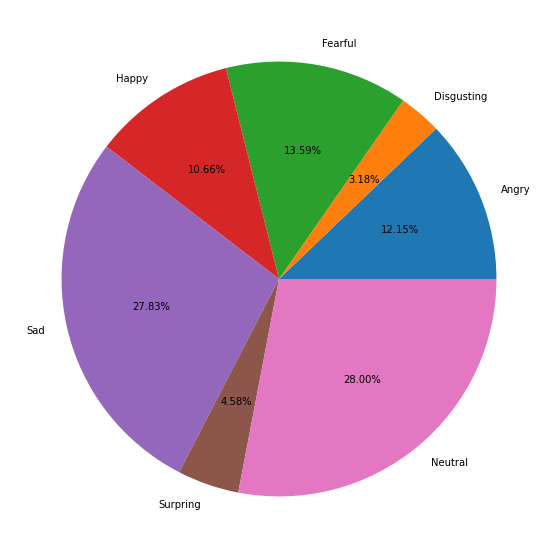

박지원님, 당신의 오늘 기분은 Neutral입니다.


In [ ]:
ASHP.Face_emotion_Stress_Score()

Found 1 images belonging to 1 classes.
-------------------------------------
                                      
음성 스트레스 분석 결과: High stress
                                      
-------------------------------------


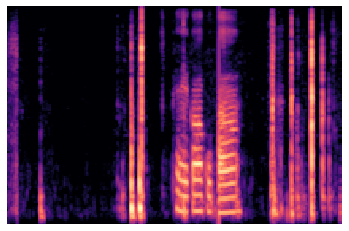

In [ ]:
ASHP.Voice_Stress()

In [ ]:
new_script=ASHP.STT()
print(new_script)

배가 고파


In [ ]:
ASHP.Senteimet_predict(new_script)

In [ ]:
ASHP.Spoori(new_script)